In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the datasets

In [3]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [4]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(10000, 14)

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Since RowNumber,CustomerId And Surname doesn't provide much information on predicting the customer churning behaviour in a bank
# So, we remove those columns in our dataset


In [7]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [8]:
X.shape

(10000, 10)

In [9]:
# Printing the  feature values of our dataset

In [10]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [11]:
# Printing the labels of our datasets

In [12]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [13]:
# By observing the feature values ,we know that country and gender are categorical values in the dataset and 
#  while building our machine learning models the categorical varaibale and values are not allowed. So we need to encode those categorical data

In [14]:
# Encoding Categorical Data

In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [16]:
label_X_1 = LabelEncoder()
X['Geography'] = label_X_1.fit_transform(X['Geography'])
label_X_2 = LabelEncoder()
X['Gender'] = label_X_2.fit_transform(X['Gender'])


In [17]:
# 0 stans for France , 2 stands for Spain and 1 stands for germany
# 0 stands for Female and 1 stands for Male

In [18]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [19]:
# Since we are encoding three different countries France , Spain and germany as 0 , 2 and 1 . However there are not any relationship between these countries
# but encoding them like this shows that Spain is greater than germany and France mathematically. So for this purpose we need to perform one hot encoding.
X.Geography.values.shape

(10000,)

In [20]:
onehotencoder = OneHotEncoder()
ohe = onehotencoder.fit_transform(X.Geography.values.reshape(-1,1)).toarray()


In [21]:
# 0 stans for France , 2 stands for Spain and 1 stands for germany
# 0 stands for Female and 1 stands for Male

In [22]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [23]:
i = 0
for items in ohe:
  print(items)
  i+= 1
  if(i==5):
    break

[1. 0. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]


In [24]:
encoded_df = pd.DataFrame(ohe,columns=['France','Germany','Spain'])

In [25]:
encoded_df

,France,Germany,Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [26]:
import pandas as pd


In [27]:
X = pd.concat([encoded_df,X],axis=1)

In [28]:
X

,France,Germany,Spain,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,0,42,2,0.00,1,1,1,101348.88
1,0.0,0.0,1.0,608,2,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,0,42,8,159660.80,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,0,39,1,0.00,2,0,0,93826.63
4,0.0,0.0,1.0,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,0,1,39,5,0.00,2,1,0,96270.64
9996,1.0,0.0,0.0,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,0,36,7,0.00,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,1,42,3,75075.31,2,1,0,92888.52


In [29]:
# Removing one dummy feature / variable / columns.
# Dropping Geography columns and one dummy variable columns i.e. France 
# 

In [30]:
preprocessed_dataframe = X.drop(['France','Geography'],axis=1)

In [31]:
preprocessed_dataframe.head()

,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88
1,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57
3,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63
4,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10


In [32]:
trainable_data = preprocessed_dataframe.iloc[:,:].values


In [33]:
trainable_data[0]

array([0.0000000e+00, 0.0000000e+00, 6.1900000e+02, 0.0000000e+00,
       4.2000000e+01, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0134888e+05])

In [34]:
trainable_labels = dataset.iloc[:,13].values
trainable_labels

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [35]:
trainable_data.shape

(10000, 11)

In [36]:
# Splitting the dataset into Training set and Test set

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(trainable_data,trainable_labels,test_size=0.2,random_state=0)

In [39]:
#Feature Scaling


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [42]:
# Now Data preprocessing step is finished now we must focus on building the architecture of ANN 

In [43]:
#Importing the Keras Libraries and Packages

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
import tensorflow as tf

In [45]:
rms_model = Sequential()


In [46]:

rms_model.add(Dense(units=16,kernel_initializer='uniform',activation='relu',input_dim=11))
rms_model.add(Dense(units = 16,kernel_initializer='uniform',activation='relu'))
rms_model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
rms_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
rms_model.fit(x=X_train,y=y_train,batch_size=25,epochs=150,validation_data=(X_test,y_test))

Epoch 1/150
320/320 [==============================] - 2s 3ms/step - loss: 0.5000 - accuracy: 0.7955 - val_loss: 0.4288 - val_accuracy: 0.7975
Epoch 2/150
320/320 [==============================] - 1s 3ms/step - loss: 0.4281 - accuracy: 0.7960 - val_loss: 0.4210 - val_accuracy: 0.7975
Epoch 3/150
320/320 [==============================] - 1s 3ms/step - loss: 0.4210 - accuracy: 0.8091 - val_loss: 0.4142 - val_accuracy: 0.8255
Epoch 4/150
320/320 [==============================] - 1s 3ms/step - loss: 0.4162 - accuracy: 0.8266 - val_loss: 0.4114 - val_accuracy: 0.8305
Epoch 5/150
320/320 [==============================] - 1s 3ms/step - loss: 0.4120 - accuracy: 0.8317 - val_loss: 0.4067 - val_accuracy: 0.8395
Epoch 6/150
320/320 [==============================] - 1s 3ms/step - loss: 0.4088 - accuracy: 0.8347 - val_loss: 0.4042 - val_accuracy: 0.8370
Epoch 7/150
320/320 [==============================] - 1s 3ms/step - loss: 0.4059 - accuracy: 0.8345 - val_loss: 0.4016 - val_accuracy: 0.8405

Epoch 58/150
320/320 [==============================] - 1s 2ms/step - loss: 0.3881 - accuracy: 0.8404 - val_loss: 0.3965 - val_accuracy: 0.8430
Epoch 59/150
320/320 [==============================] - 1s 2ms/step - loss: 0.3884 - accuracy: 0.8428 - val_loss: 0.3955 - val_accuracy: 0.8415
Epoch 60/150
320/320 [==============================] - 1s 2ms/step - loss: 0.3877 - accuracy: 0.8420 - val_loss: 0.3947 - val_accuracy: 0.8435
Epoch 61/150
320/320 [==============================] - 1s 3ms/step - loss: 0.3879 - accuracy: 0.8424 - val_loss: 0.3945 - val_accuracy: 0.8435
Epoch 62/150
320/320 [==============================] - 1s 3ms/step - loss: 0.3865 - accuracy: 0.8432 - val_loss: 0.3982 - val_accuracy: 0.8440
Epoch 63/150
320/320 [==============================] - 1s 2ms/step - loss: 0.3869 - accuracy: 0.8415 - val_loss: 0.3952 - val_accuracy: 0.8435
Epoch 64/150
320/320 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.8422 - val_loss: 0.3950 - val_accuracy:

Epoch 115/150
320/320 [==============================] - 1s 2ms/step - loss: 0.3183 - accuracy: 0.8729 - val_loss: 0.3361 - val_accuracy: 0.8700
Epoch 116/150
320/320 [==============================] - 1s 2ms/step - loss: 0.3177 - accuracy: 0.8712 - val_loss: 0.3374 - val_accuracy: 0.8665
Epoch 117/150
320/320 [==============================] - 1s 2ms/step - loss: 0.3186 - accuracy: 0.8737 - val_loss: 0.3381 - val_accuracy: 0.8640
Epoch 118/150
320/320 [==============================] - 1s 3ms/step - loss: 0.3183 - accuracy: 0.8720 - val_loss: 0.3374 - val_accuracy: 0.8655
Epoch 119/150
320/320 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8731 - val_loss: 0.3385 - val_accuracy: 0.8635
Epoch 120/150
320/320 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.8709 - val_loss: 0.3388 - val_accuracy: 0.8630
Epoch 121/150
320/320 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8723 - val_loss: 0.3382 - val_ac

In [47]:
rms_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8655


[0.34325969219207764, 0.8654999732971191]

In [48]:
yp = rms_model.predict(X_test)
yp[:5]

array([[0.16287526],
       [0.19183624],
       [0.07459319],
       [0.0318284 ],
       [0.03319326]], dtype=float32)

In [49]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [50]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.80      0.45      0.58       405

    accuracy                           0.87      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Text(69.0, 0.5, 'Truth')

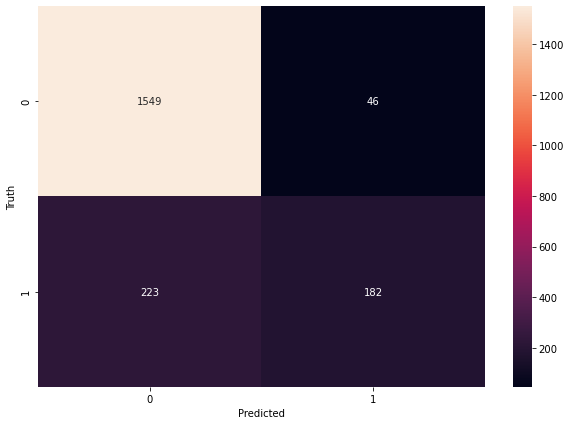

In [51]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')